# Project 1: Investigate a Dataset - TMDb Movies Dataset 

## Table of Content

1) Introduction 
2) Data Wrangling 
3) Exploratory Data Analysis 
4) Conclusions 

## 1) Introduction 

To explore and conduct my own analysis of the data TMDb movie data set and draw conclusions and insight from the data. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Questions to explore and conduct analysis on:

1. Movie with the highest earning revenue and release year 

2. Movies with highest Profit (top 10)

3. Does higher budget equal higher revenue/profit?

4. What genres get produced the most? 

5. Which Director has the most movies?

6. Which director generates the most revenue?

In [1]:

# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



# 2) Data Wrangling 

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. I will outline each cleaning step and why it is revelent to the process. 

## General Properties 

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#loading the csv file and storing it in 'df'
df = pd.read_csv('tmdb-movies.csv')

#printing first five rows
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# review the last 5 rows 

df.tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
# Understand the dimensions 

df.shape

(10866, 21)

# Check the columns and values to better undertand the data

## check for cleanliness

In [5]:
# df.info will display  concise summary of the dataframe,
# including the number of non-null values in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### df.info gives us important indicators about our data being used 

- If there are duplicates 
- If columns have the right data types assigned 
- Missing values  

In [6]:
# How much of this data is duplicated? 
# Check the sum data again but for duplicates 

df.duplicated().sum()

1

In [7]:
# Drop duplicates 

df.drop_duplicates(inplace=True)

In [8]:
#Verify the duplicates are gone
df.duplicated().sum()

0

In [9]:
# How many missing values are there?
# Check the sum data again but for missing values 
df.isnull().sum()


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## Five columns appear to have missing values 

### - Do we need those columns to complete analysis? Yes, director is needed.  

The data we are wrangling the three other columns (tagline, overview, homepage) do not add any insight to the questions we are analyzing. Columns can be removed in the cleaning process. 

-----------------------------------

## Observations after checking the data columns in df.head and compared it to df.info 

    - Budget and Revenue columns  will be compared using the US dollar.
    
    - Release date is a string convert to datetime 
    



# Data Cleaning Steps

1. Remove unnecessary columns: ,'overview', 'id', 'status', 'popularity', 'homepage', 'keywords', 'overview', 'production_companies'

2. Remove missing values as NAN 

3. Change data type for budget and revenue columns

4. Change string to datetime format: release_date column 

5. Fix nested rows in genre and directors 


---------

In [10]:
#check columns again 
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


## Remove columns 

In [11]:
# a list of columns we want to remove
df.drop(['production_companies','imdb_id','keywords','budget_adj','homepage','tagline','overview','revenue_adj','release_date',
         'vote_count',], axis=1, inplace=True)

In [12]:
# check results 
df.head(5)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,7.3,2015


In [13]:
#check results
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          10865 non-null  int64  
 3   revenue         10865 non-null  int64  
 4   original_title  10865 non-null  object 
 5   cast            10789 non-null  object 
 6   director        10821 non-null  object 
 7   runtime         10865 non-null  int64  
 8   genres          10842 non-null  object 
 9   vote_average    10865 non-null  float64
 10  release_year    10865 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1018.6+ KB


In [14]:
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_average       0
release_year       0
dtype: int64

## Drop missing Values

In [15]:
# drop misisng values 
df = df.dropna(subset=['cast', 'director','genres'])


In [16]:
#check results 
df.isna().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
vote_average      0
release_year      0
dtype: int64

In [17]:
df.head(5)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,7.3,2015


## Change string to datetime for release_date

In [18]:
#check results
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10731 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          10731 non-null  int64  
 3   revenue         10731 non-null  int64  
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   runtime         10731 non-null  int64  
 8   genres          10731 non-null  object 
 9   vote_average    10731 non-null  float64
 10  release_year    10731 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1006.0+ KB


In [19]:
#Change nested columns in genres

df['genres'] = df['genres'].str.split("|") 

In [20]:
df.head(5)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",7.3,2015


In [21]:
# Check columns 
genre = df.explode('genres')
genre.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,6.5,2015


-------

# Exploratory Data Analysis 

Not that the data is better prepared to analyze we can answer the following questions:

1. Movies with the highest earning revenue and year of release

    1.2 oldest and newest release_year in the data 

2. Movies with highest Profit 

3. Does higher budget equal higher revenue/profit?

4. What genres get produced the most? 

5. Which Director has the most movies?

6. Which director generates the most revenue?


In [22]:
#Quick view of data 
df.head(5)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",7.3,2015


# Movie with Highest grossing Revenue 

In [23]:
df.sort_values('revenue',ascending=False).head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,"[Action, Adventure, Fantasy, Science Fiction]",7.1,2009


### Avatar was the highest grossing in 2009 with $2,781,505,847.00

In [24]:
#Using function to discover highest and lowest grossing Revenue 

In [25]:
# Create function to get max and min result for a given column 

import pprint
#defining the function


def calculate(column):
    #for max
    highest= df[column].idxmax()
    high_result=pd.DataFrame(df.loc[highest])
    
    #for min
    lowest= df[column].idxmin()
    low_result=pd.DataFrame(df.loc[lowest])
    
    #collecting data in one place
    result =pd.concat([high_result, low_result], axis=1)
    
    return result

#calling the function
calculate('revenue')

,1386,48
id,19995,265208
popularity,9.432768,2.93234
budget,237000000,30000000
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
runtime,162,92
genres,"[Action, Adventure, Fantasy, Science Fiction]","[Thriller, Crime, Drama]"
vote_average,7.1,5.3


In [51]:
# Oldest and Newest Movie in the dataset 
calculate('release_year')

,0,10141
id,135397,539
popularity,32.985763,2.610362
budget,150000000,806948
revenue,1513528810,32000000
original_title,Jurassic World,Psycho
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Anthony Perkins|Vera Miles|John Gavin|Janet Le...
director,[Colin Trevorrow],[Alfred Hitchcock]
runtime,124,109
genres,"[Action, Adventure, Science Fiction, Thriller]","[Drama, Horror, Thriller]"
vote_average,6.5,8.0


---------

# Movies with the highest earning Profit (Revenue - Budget) 


In [27]:
# Create a profit column
df['profit'] = df['revenue']- df['budget']

In [28]:
#Get statistical information 
df.describe()

,id,popularity,budget,revenue,runtime,vote_average,release_year,profit
count,10731.000000,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000,10731.000000,1.073100e+04
mean,65201.741869,0.652615,1.480365e+07,4.031989e+07,102.468829,5.964710,2001.259622,2.551624e+07
std,91470.508056,1.004804,3.106456e+07,1.176524e+08,30.493873,0.930283,12.820151,9.715071e+07
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000,-4.139124e+08
25%,10547.500000,0.210765,0.000000e+00,0.000000e+00,90.000000,5.400000,1995.000000,0.000000e+00
50%,20323.000000,0.387081,0.000000e+00,0.000000e+00,99.000000,6.000000,2006.000000,0.000000e+00
75%,73948.500000,0.720889,1.600000e+07,2.500000e+07,112.000000,6.600000,2011.000000,9.971094e+06
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000,2.544506e+09


In [29]:
#Sort values from highest to lowest for Profit 
top_df = df.sort_values('profit', ascending=False).head(10)
top_df

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,"[Action, Adventure, Fantasy, Science Fiction]",7.1,2009,2544505847
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",7.5,2015,1868178225
5231,597,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,"[Drama, Romance, Thriller]",7.3,1997,1645034188
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",6.5,2015,1363528810
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",7.3,2015,1316249360
4361,24428,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,"[Science Fiction, Action, Adventure]",7.3,2012,1299557910
3374,12445,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130,"[Adventure, Family, Fantasy]",7.7,2011,1202817822
14,99861,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,"[Action, Adventure, Science Fiction]",7.4,2015,1125035767
5422,109445,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102,"[Animation, Adventure, Family]",7.5,2013,1124219009
8094,1642,1.136610,22000000,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114,"[Crime, Drama, Mystery, Thriller, Action]",5.6,1995,1084279658


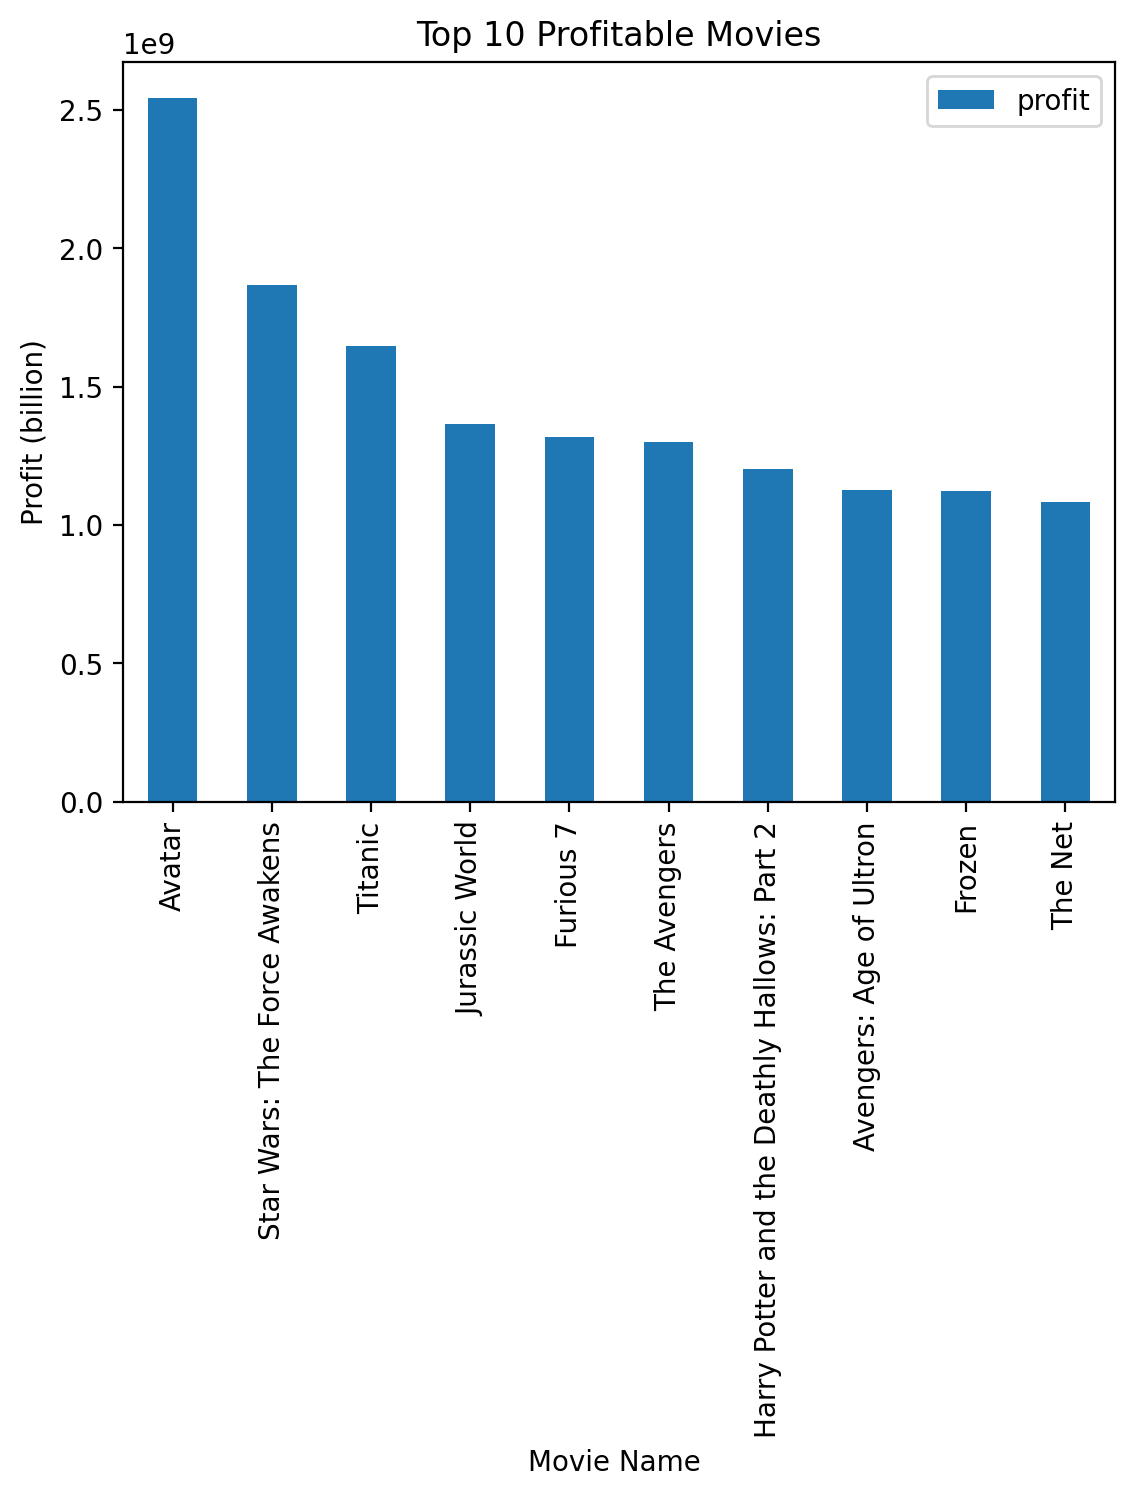

In [30]:
#Display top 10 earning movies 

top_df.plot(y ='profit', x = 'original_title', kind = 'bar')

plt.title("Top 10 Profitable Movies")
plt.xlabel("Movie Name ")
plt.ylabel("Profit (billion)");

In [31]:
# Show profit margin 
df['profit_margin_percent'] = df['profit']/df['revenue']*100

In [32]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin_percent
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",6.5,2015,1363528810,90.089386
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",7.1,2015,228436354,60.363216
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",6.3,2015,185238201,62.741949
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",7.5,2015,1868178225,90.329654
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",7.3,2015,1316249360,87.385887


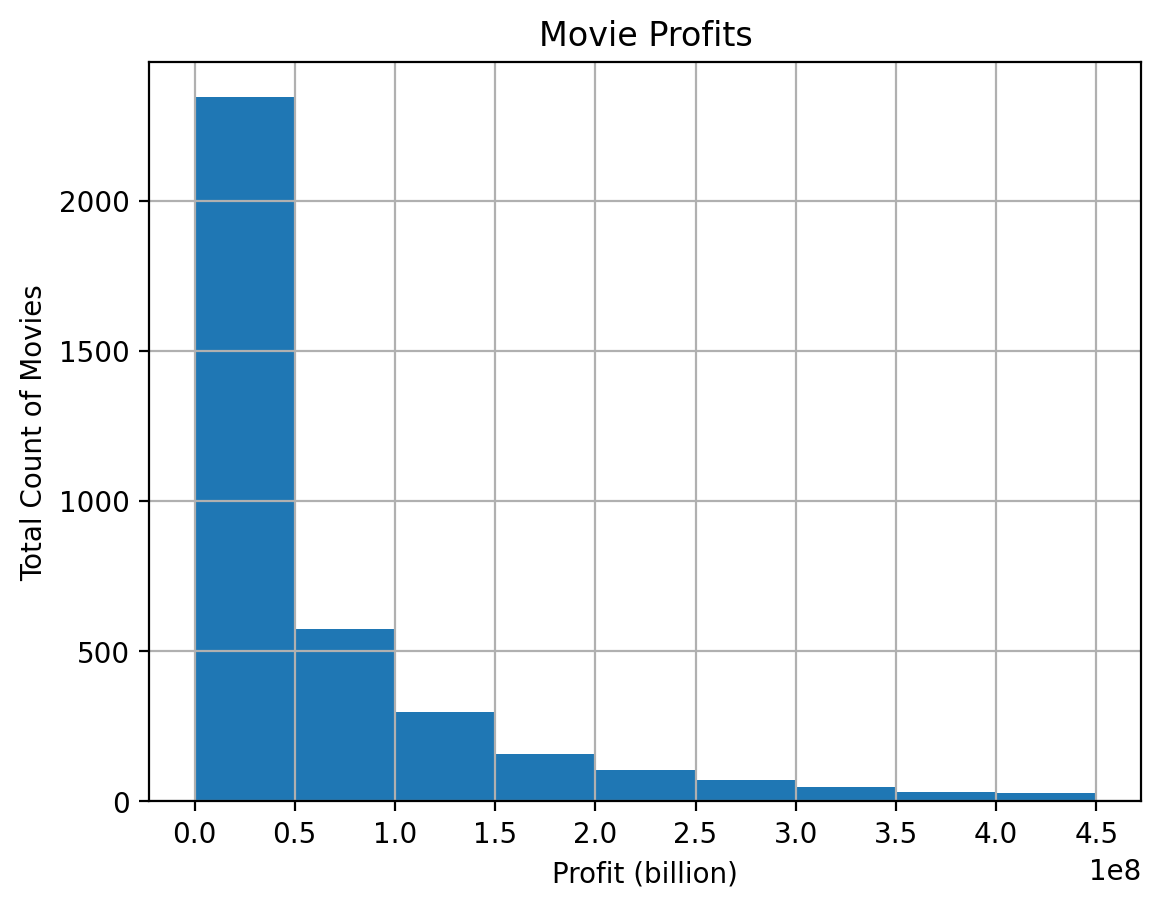

In [33]:
x_ticks = np.arange(1.000000e+00,5.000000e+08,5.000000e+07)

df['profit'].hist(bins=x_ticks)

plt.title("Movie Profits")
plt.xlabel("Profit (billion)")
plt.xticks(x_ticks)
plt.ylabel("Total Count of Movies");

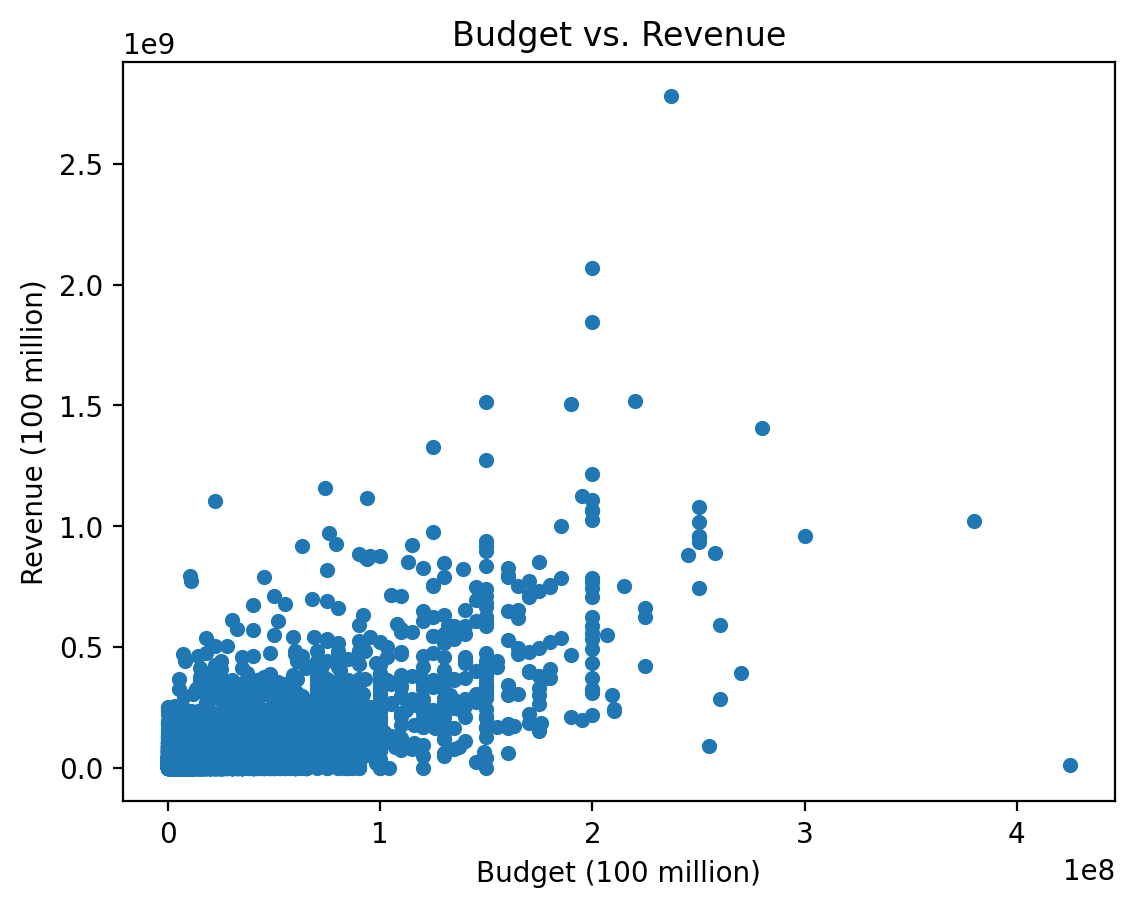

In [34]:
# Budget and revenue 

df.plot(y='revenue',x='budget',kind='scatter')

plt.title("Budget vs. Revenue")
plt.xlabel("Budget (100 million)")
plt.ylabel("Revenue (100 million)");

## On average data shows that the higher the budget the higher the revenue

For example one reason could be the budget is higher due to casting betters actor (more expensive) which poeple want to see in the movie generating more revenue.  



## Further exploration 
if we investigate blobkbusters movies that have recurring series/releases we might find that higher budgets do not equal higher revenue.


------

In [35]:
# review data quickly 
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin_percent
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",6.5,2015,1363528810,90.089386
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",7.1,2015,228436354,60.363216
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",6.3,2015,185238201,62.741949


# What genres get produced the most?

In [36]:
# Get information 
genre['genres'].value_counts()

genres
Drama              4746
Comedy             3775
Thriller           2902
Action             2376
Romance            1708
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               399
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
Name: count, dtype: int64

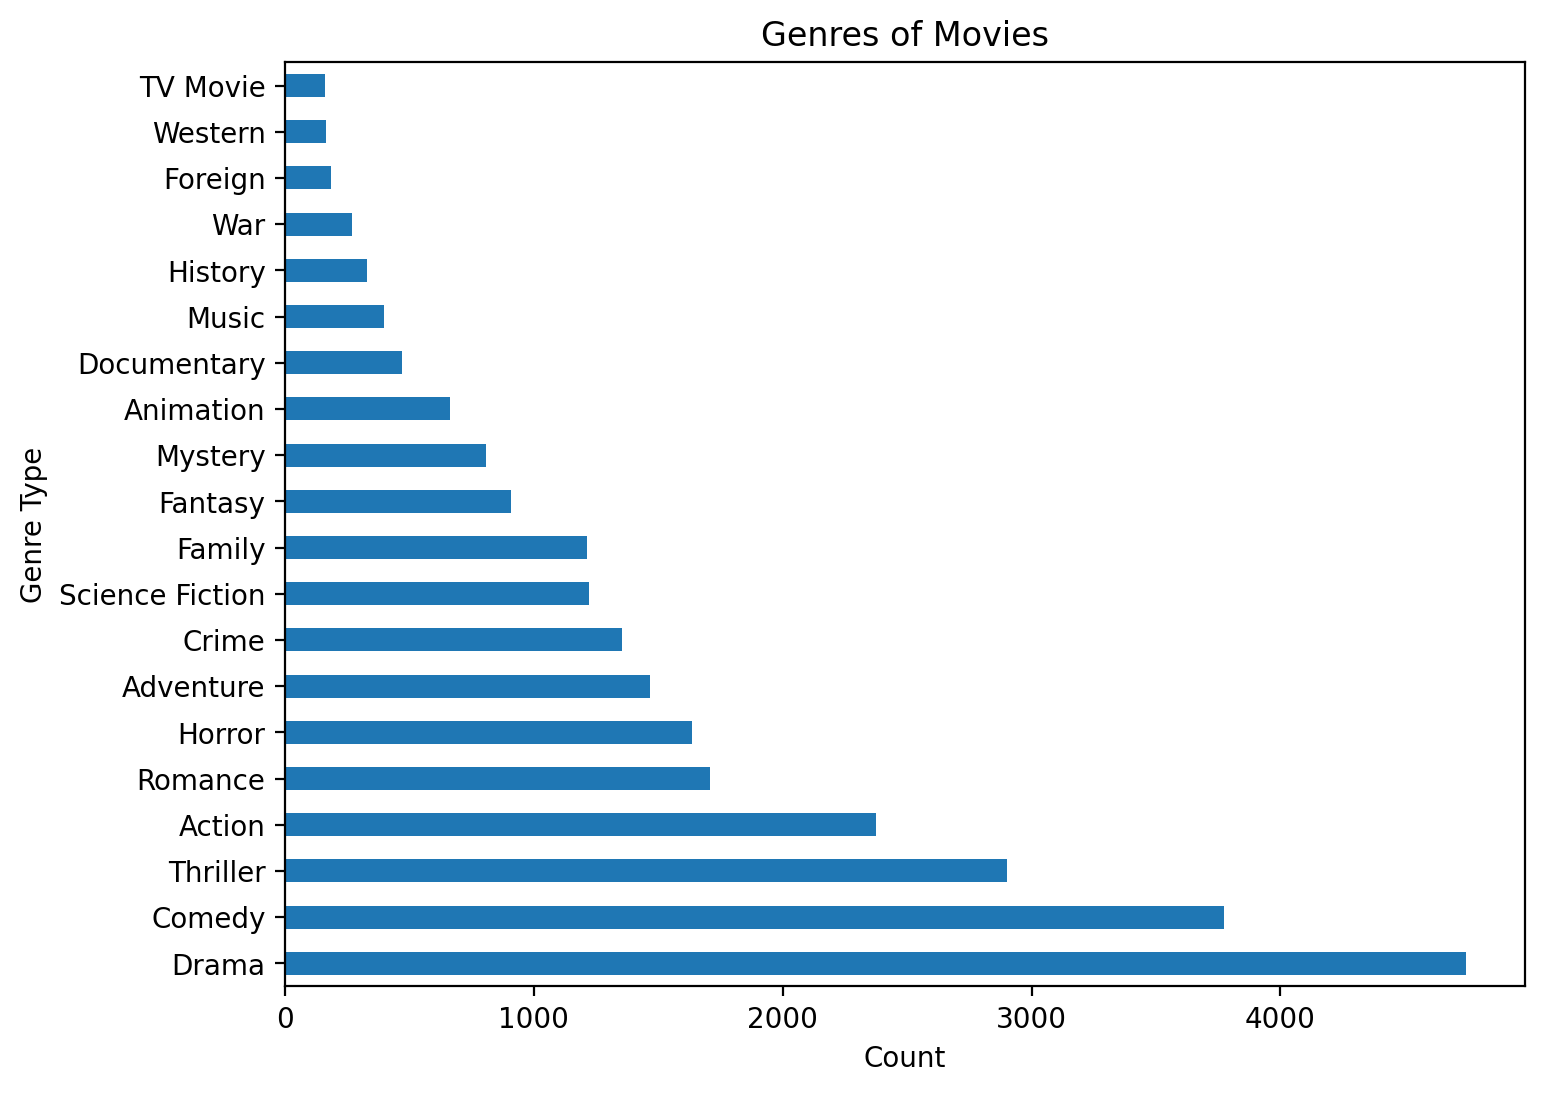

In [37]:
# visualize data 

plt.figure(figsize=[8,6])
genre['genres'].value_counts().plot.barh()
plt.title("Genres of Movies")
plt.ylabel("Genre Type")
plt.xlabel("Count");

# Genre Conclusion 

- The drama, comedy and thriller genres have the highest rank while foreign, Western and TV Movie have the lowest count. 


- Further analysis would be to see if high count genres = more popularity or higher profits 

Something to note: It is common for a movie to have various genres and not just one. For example the drama genres has the highest count but dramas can also have a comedy genre as well. 




------

# How do directors compare to each other? 

In [38]:
#quick view of data 
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin_percent
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",6.5,2015,1363528810,90.089386
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",7.1,2015,228436354,60.363216
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",6.3,2015,185238201,62.741949


In [39]:
#Split nested row in director column

df['director'] = df['director'].str.split("|")
df.head(5)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin_percent
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]",6.5,2015,1363528810,90.089386
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,[George Miller],120,"[Action, Adventure, Science Fiction, Thriller]",7.1,2015,228436354,60.363216
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,[Robert Schwentke],119,"[Adventure, Science Fiction, Thriller]",6.3,2015,185238201,62.741949
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,[J.J. Abrams],136,"[Action, Adventure, Science Fiction, Fantasy]",7.5,2015,1868178225,90.329654
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,[James Wan],137,"[Action, Crime, Thriller]",7.3,2015,1316249360,87.385887


In [40]:
#use explode 
directors_df = df.explode('director')
directors_df.head(5)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin_percent
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",6.5,2015,1363528810,90.089386
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",7.1,2015,228436354,60.363216
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",6.3,2015,185238201,62.741949
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",7.5,2015,1868178225,90.329654
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",7.3,2015,1316249360,87.385887


In [41]:
#check shape 
directors_df.shape

(11774, 13)

# which Director has directed the most movies? 

In [42]:
# How many movies have directors directed?

df['director'].value_counts()

director
[Woody Allen]                45
[Clint Eastwood]             34
[Steven Spielberg]           29
[Martin Scorsese]            28
[Ridley Scott]               23
                             ..
[Yoshihiro Nishimura]         1
[Jon Poll]                    1
[Jean-StÃ©phane Sauvaire]     1
[Gianni Di Gregorio]          1
[Harold P. Warren]            1
Name: count, Length: 5018, dtype: int64

Woody Allen with 45 movies and Clint Eastwood with 34 movies  

In [43]:
# List of all Woody Allen's movies he has directed 
directors_df.query('director == "Woody Allen"')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin_percent
155,282984,1.007054,11000000,27391084,Irrational Man,Emma Stone|Joaquin Phoenix|Jamie Blackley|Park...,Woody Allen,95,"[Mystery, Drama]",6.1,2015,16391084,59.840947
790,229297,0.889247,0,32339326,Magic in the Moonlight,Colin Firth|Emma Stone|Hamish Linklater|Marcia...,Woody Allen,97,"[Comedy, Drama, Romance]",6.3,2014,32339326,100.000000
1332,703,1.179653,4000000,38251425,Annie Hall,Woody Allen|Diane Keaton|Tony Roberts|Carol Ka...,Woody Allen,93,"[Comedy, Drama, Romance]",7.6,1977,34251425,89.542873
1489,19265,0.804857,15000000,0,Whatever Works,Larry David|Evan Rachel Wood|Adam Brooks|Micha...,Woody Allen,92,"[Comedy, Romance]",6.7,2009,-15000000,-inf
2126,38031,0.493121,22000000,0,You Will Meet a Tall Dark Stranger,Naomi Watts|Josh Brolin|Antonio Banderas|Ewen ...,Woody Allen,98,"[Comedy, Drama, Romance]",5.8,2010,-22000000,-inf
2551,9684,0.281948,0,0,Sweet and Lowdown,Woody Allen|Ben Duncan|Daniel Okrent|Dan Moran...,Woody Allen,95,"[Comedy, Drama]",6.5,1999,0,NaN
2744,2779,0.446532,0,0,The Curse of the Jade Scorpion,Woody Allen|Helen Hunt|John Tormey|John Schuck...,Woody Allen,103,"[Comedy, Crime, Mystery, Romance, Thriller]",6.1,2001,0,NaN
2964,5038,0.866771,15000000,96408652,Vicky Cristina Barcelona,Scarlett Johansson|Rebecca Hall|Javier Bardem|...,Woody Allen,96,"[Drama, Romance]",6.7,2008,81408652,84.441230
3429,59436,1.367727,30000000,151119219,Midnight in Paris,Owen Wilson|Rachel McAdams|Kurt Fuller|Mimi Ke...,Woody Allen,94,"[Fantasy, Comedy, Romance]",7.2,2011,121119219,80.148124
4046,9689,0.444428,16000000,0,Hollywood Ending,Woody Allen|George Hamilton|TÃ©a Leoni|Debra M...,Woody Allen,112,"[Comedy, Drama]",6.2,2002,-16000000,-inf


-------------

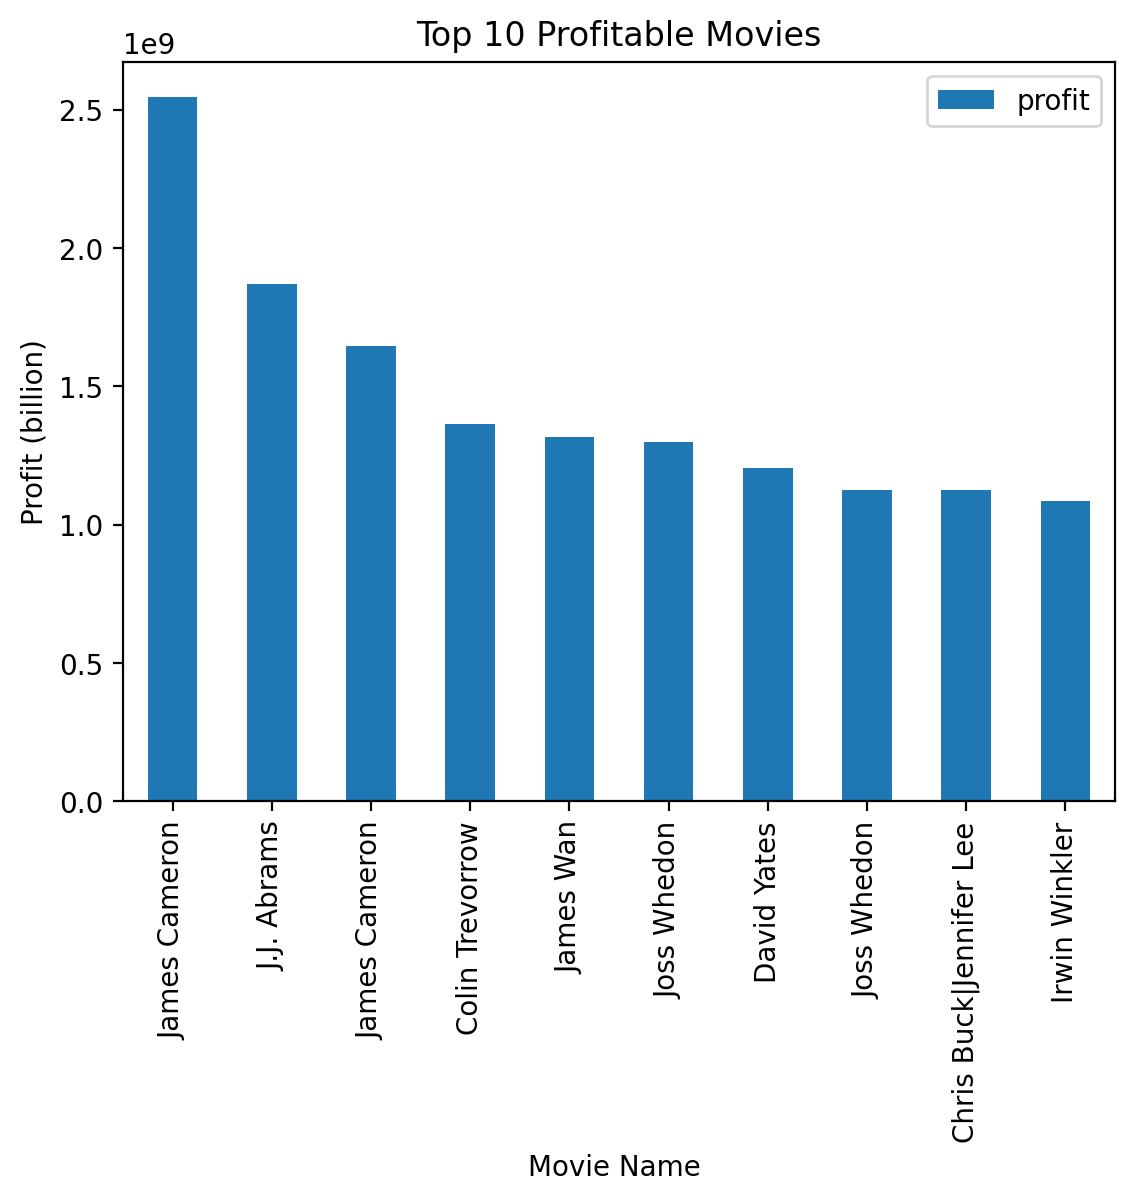

In [44]:
# Which directors directed the top 10 protibale movies from earlier? 

top_df.plot(y ='profit', x = 'director', kind = 'bar')

plt.title("Top 10 Profitable Movies")
plt.xlabel("Movie Name ")
plt.ylabel("Profit (billion)");

# High grossing movies can be an unique achievement for directors. So, which director on average has the highest revenue and profit? Is it James Cameron? 

In [45]:
#group data by director and profit 
directors_df.groupby('director')[['revenue','profit']].mean().sort_values('profit', ascending=False).head(20)

,revenue,profit
director,,
Pierre Coffin,8.903356e+08,8.173356e+08
Colin Trevorrow,7.587683e+08,6.833933e+08
David Yates,8.308591e+08,6.758591e+08
Lee Unkrich,7.439073e+08,6.191573e+08
Robert Stromberg,7.584104e+08,5.784104e+08
J.J. Abrams,7.158340e+08,5.678340e+08
Jennifer Lee,6.371095e+08,5.621095e+08
Bob Peterson,7.313427e+08,5.563427e+08
Chris Miller,6.769728e+08,5.319728e+08


# Conclusion

### Suprisingly, James Cameron did not appear on the top 10 list of highest revenue and profit. He is in 12th place. A director named Pierre Coffin is listed as no. 1

### Not even Woody Allen appeared on the list despite directing the most movies compared to everyone else 

In [46]:
#What movies did Pierre Coffin direct?

directors_df.query('director == "Pierre Coffin"').sort_values('profit', ascending=False).head(5)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin_percent
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Pierre Coffin,91,"[Family, Animation, Adventure, Comedy]",6.5,2015,1082730962,93.602661
5434,93456,3.928789,76000000,970761885,Despicable Me 2,Steve Carell|Kristen Wiig|Benjamin Bratt|Miran...,Pierre Coffin,98,"[Animation, Comedy, Family]",7.0,2013,894761885,92.171098
1924,20352,3.791881,69000000,543513985,Despicable Me,Steve Carell|Jason Segel|Russell Brand|Julie A...,Pierre Coffin,95,"[Action, Animation, Family]",7.1,2010,474513985,87.304834


In [47]:
#Statistics of Pierre Coffin Movies 
directors_df.query('director == "Pierre Coffin"').describe()

,id,popularity,budget,revenue,runtime,vote_average,release_year,profit,profit_margin_percent
count,3.000000,3.000000,3.000000e+00,3.000000e+00,3.000000,3.000000,3.000000,3.000000e+00,3.000000
mean,108493.333333,5.041612,7.300000e+07,8.903356e+08,94.666667,6.866667,2012.666667,8.173356e+08,91.026198
std,96542.356742,2.047176,3.605551e+06,3.144202e+08,3.511885,0.321455,2.516611,3.114131e+08,3.301326
min,20352.000000,3.791881,6.900000e+07,5.435140e+08,91.000000,6.500000,2010.000000,4.745140e+08,87.304834
25%,56904.000000,3.860335,7.150000e+07,7.571379e+08,93.000000,6.750000,2011.500000,6.846379e+08,89.737966
50%,93456.000000,3.928789,7.400000e+07,9.707619e+08,95.000000,7.000000,2013.000000,8.947619e+08,92.171098
75%,152564.000000,5.666477,7.500000e+07,1.063746e+09,96.500000,7.050000,2014.000000,9.887464e+08,92.886879
max,211672.000000,7.404165,7.600000e+07,1.156731e+09,98.000000,7.100000,2015.000000,1.082731e+09,93.602661


-----

# Conclusion 


After reviewing, cleaning and exploring the data I found the following:


1. Movies with the highest earning revenue and release year


Avatar had the higestest earnings with $2,781,505,847.00 and was released in 2009. 	

The oldest movie in the database was for 1960 and 2015 for release_year. 

------------------------------------------------------------------------------------------------------------------------------------------

2. Movies with highest Profit (top 10)

Avatar, Starwars: The force Awakends, Titanic, Jurassic World, Furious 7, the Avengers, Harry Potter and the Deadly Hallows: Part 2, Avengers Age of Ultron, Frozen and The Net. 

Looking at the statisitical data the standard for budget, revenue and profit are:

Budget: $31,064,560.00 	 

Revenue: $117,652,400.00 		

Profit: $97,150,710.00

------------------------------------------------------------------------------------------------------------------------------------------

3. Does higher budget equal higher revenue/profit?


Data shows that the higher the budget the higher the revenue

For example one reason could be the budget is higher due to casting betters actor (more expensive) which poeple want to see in the movie generating more revenue. 

------------------------------------------------------------------------------------------------------------------------------------------

4. What genres get produced the most? 


The drama, comedy and thriller genres have the highest rank while foreign, Western and TV Movie have the lowest count. 

------------------------------------------------------------------------------------------------------------------------------------------

5. Which Director has the most movies?


Woody Allen with 45 movies

------------------------------------------------------------------------------------------------------------------------------------------

6. Which director generates the most revenue?

Suprisingly, James Cameron did not appear on the top 10 list of highest revenue and profit despite directing the highest grossing movie in 2009 called Avatar. A director named Pierre Coffin is listed as no. 1

Not even Woody Allen appeared on the  top 20 list despite directing 45 movies. the highest compared to everyone else.  


Pierre Coffin movies profit percent ranged from 87-93% for his 3 movies.  




# Limitations of the data 

It is very rare to have a perfect set of data presented to you. With this in mind we should understand what data was misisng and what limitations this can bring to our final analysis

- For example, our genres were split into a single one but many movies had several genres. It would have been better to understand which mix of genres were th most profitable and found deeper insight to it.  

- Second, curreny was not included so we have to assume that the currency was USD. For this analysis it was fine to analyze but it could have easily have been Canadian dollars and we would have not known. 

- Third, missing data needs to be understood otherwise the analysis can be misinterpreted. For examples, the budget was an important part of this analysis but we only used 53% of it due to missing values. The movie Wildcard appeared to be the lowest revenue but this could just be due to misisng data and not that it is the lowest grossing movie. 


